# Real Estate Investment Advisor

## Import Libraries and Load Dataset

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import plotly.io as pio

# Set display options
sns.set_theme(style = "white", palette = "dark")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 14
pio.renderers.default = "plotly_mimetype"

# Load dataset
df = pd.read_csv("../data/india_housing_prices.csv")
df.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


## Basic Metadata

### Data Structure

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  Total_Floors    

In [3]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,250000.0,NaN,NaN,NaN,125000.5,72168.927986,1.0,62500.75,125000.5,187500.25,250000.0
State,250000,20,Odisha,12681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,250000,42,Coimbatore,6461,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Locality,250000,500,Locality_296,567,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Property_Type,250000,3,Villa,83744,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BHK,250000.0,NaN,NaN,NaN,2.999396,1.415521,1.0,2.0,3.0,4.0,5.0
Size_in_SqFt,250000.0,NaN,NaN,NaN,2749.813216,1300.606954,500.0,1623.0,2747.0,3874.0,5000.0
Price_in_Lakhs,250000.0,NaN,NaN,NaN,254.586854,141.349921,10.0,132.55,253.87,376.88,500.0
Price_per_SqFt,250000.0,NaN,NaN,NaN,0.130597,0.130747,0.0,0.05,0.09,0.16,0.99
Year_Built,250000.0,NaN,NaN,NaN,2006.520012,9.808575,1990.0,1998.0,2007.0,2015.0,2023.0


In [4]:
df.isnull().sum()

ID                                0
State                             0
City                              0
Locality                          0
Property_Type                     0
BHK                               0
Size_in_SqFt                      0
Price_in_Lakhs                    0
Price_per_SqFt                    0
Year_Built                        0
Furnished_Status                  0
Floor_No                          0
Total_Floors                      0
Age_of_Property                   0
Nearby_Schools                    0
Nearby_Hospitals                  0
Public_Transport_Accessibility    0
Parking_Space                     0
Security                          0
Amenities                         0
Facing                            0
Owner_Type                        0
Availability_Status               0
dtype: int64

### Observations
The dataset contains 21 variables with a ID column for each observation and 2,50,000 total observations. The best part is the data is clean. There is no blank or null values and values are formatted also, hence we can leave aside the cleaning part.

## Univariate Analysis
### Price distribution

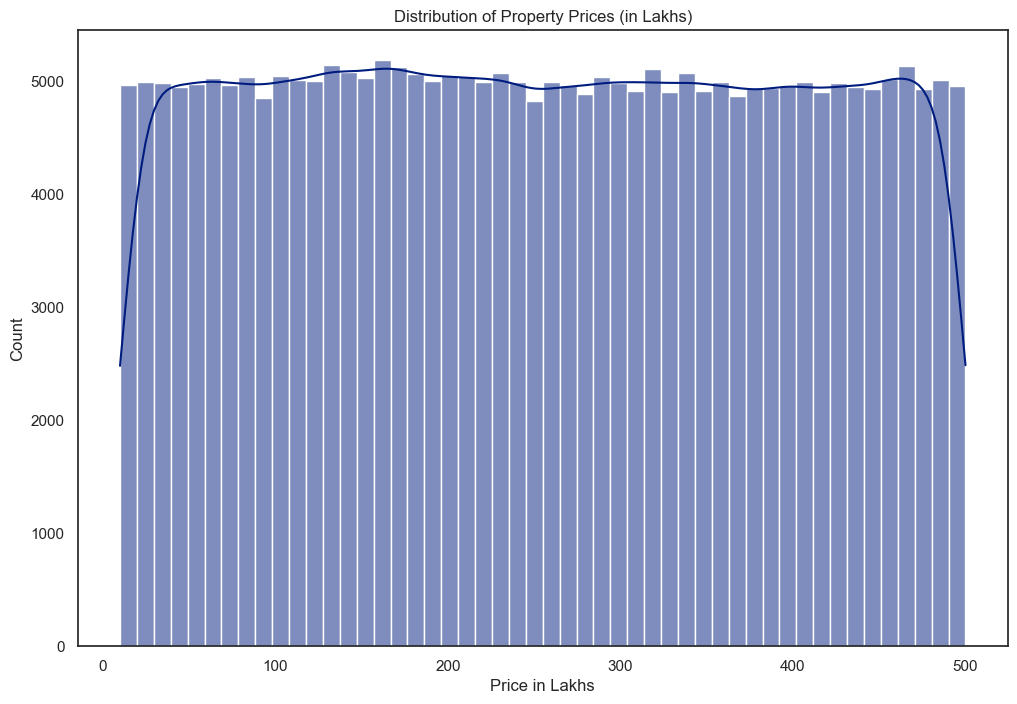

In [5]:
# Price distribution
sns.histplot(df["Price_in_Lakhs"], kde=True, bins=50)
plt.title("Distribution of Property Prices (in Lakhs)")
plt.xlabel("Price in Lakhs")
plt.show()

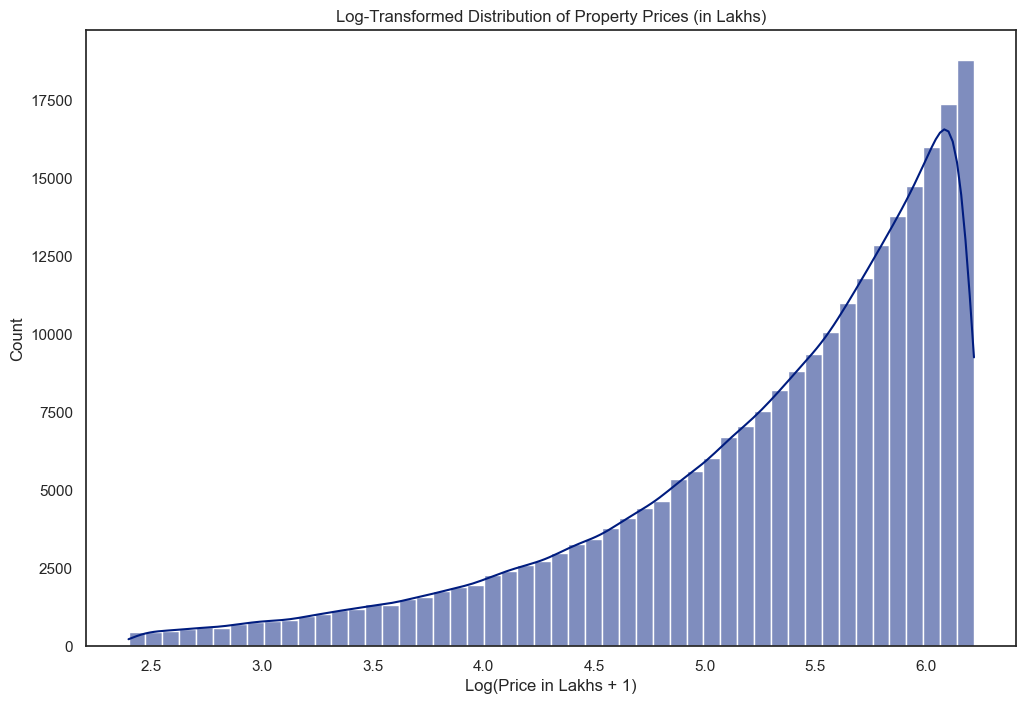

In [6]:
# Check log transformation effect
sns.histplot(np.log1p(df["Price_in_Lakhs"]), kde=True, bins=50)
plt.title("Log-Transformed Distribution of Property Prices (in Lakhs)")
plt.xlabel("Log(Price in Lakhs + 1)")
plt.show()

### Size distribution

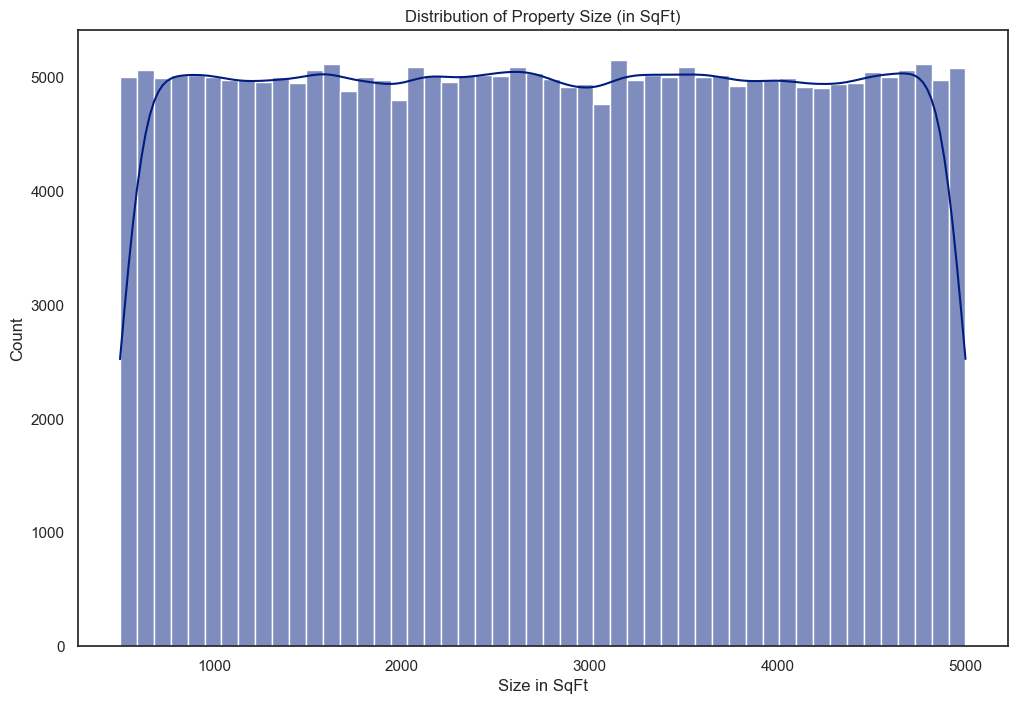

In [7]:
# Size distribution
sns.histplot(df["Size_in_SqFt"], kde=True, bins=50)
plt.title("Distribution of Property Size (in SqFt)")
plt.xlabel("Size in SqFt")
plt.show()

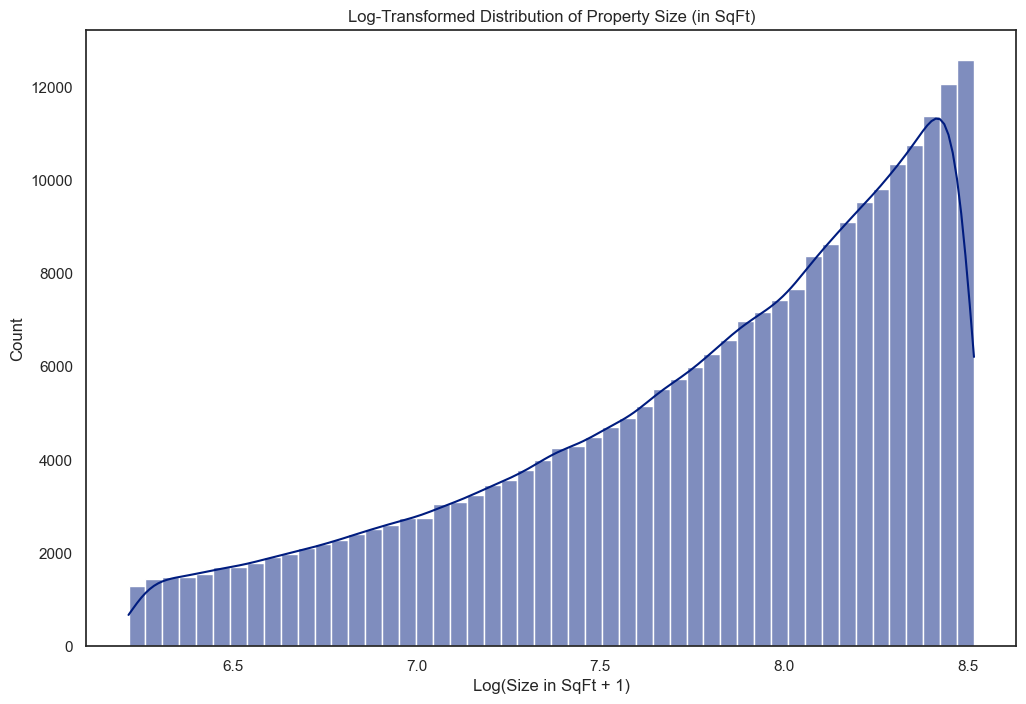

In [8]:
# Log transformation for Size
sns.histplot(np.log1p(df["Size_in_SqFt"]), kde=True, bins=50)
plt.title("Log-Transformed Distribution of Property Size (in SqFt)")
plt.xlabel("Log(Size in SqFt + 1)")
plt.show()

### Price per Sq. Ft. Distribution

Text(0.5, 0, 'Price per SqFt')

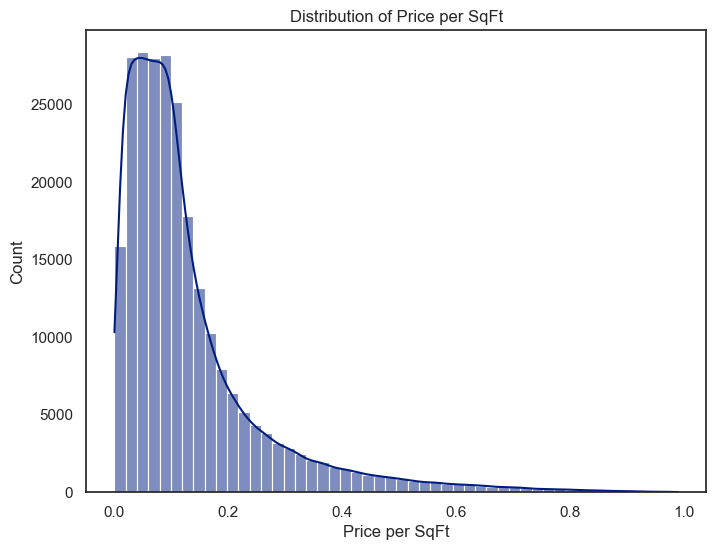

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(df["Price_per_SqFt"], kde=True, bins=50)
plt.title("Distribution of Price per SqFt")
plt.xlabel("Price per SqFt")

### Price per Sq. Ft by Property Type

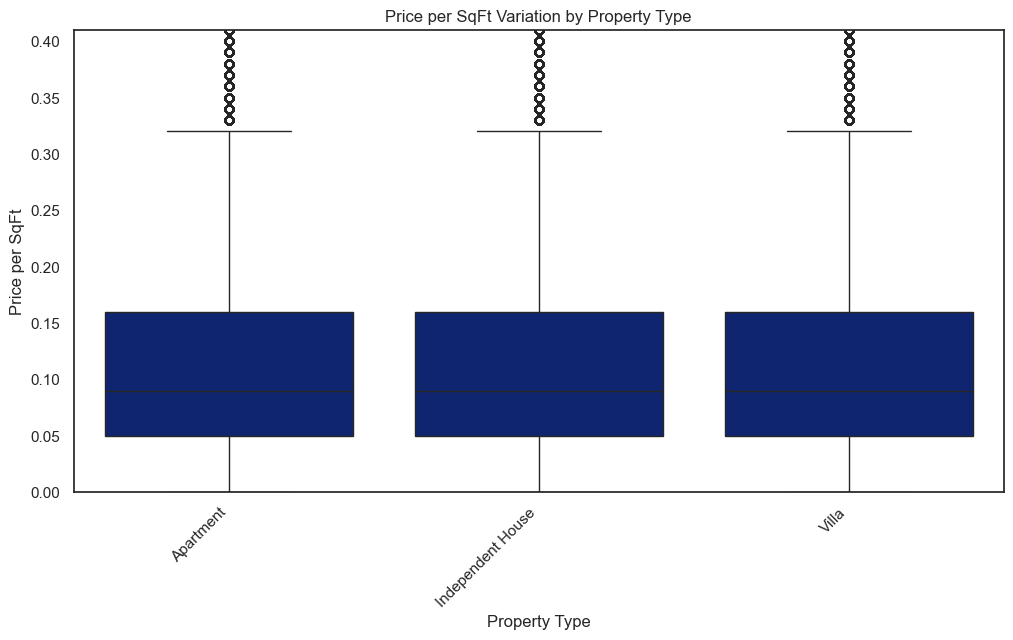

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Property_Type', y='Price_per_SqFt', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Price per SqFt Variation by Property Type')
plt.ylabel('Price per SqFt')
plt.xlabel('Property Type')
plt.ylim(0, df['Price_per_SqFt'].quantile(0.95)) # Focus on 95% of data to manage outliers
plt.show()

## Outlier Detection
### Price outliers

Text(0.5, 1.0, 'Outliers for Property Prices (in Lakhs)')

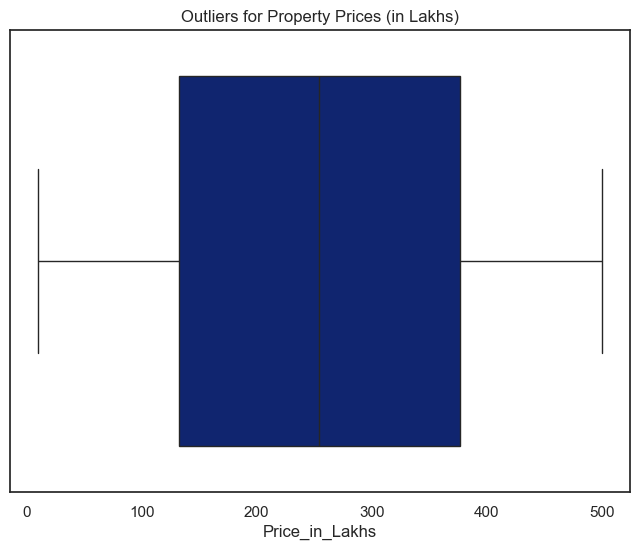

In [11]:
# Price outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["Price_in_Lakhs"])
plt.title("Outliers for Property Prices (in Lakhs)")

### Price per Sq. Ft outliers

Text(0.5, 1.0, 'Outliers for Price per SqFt')

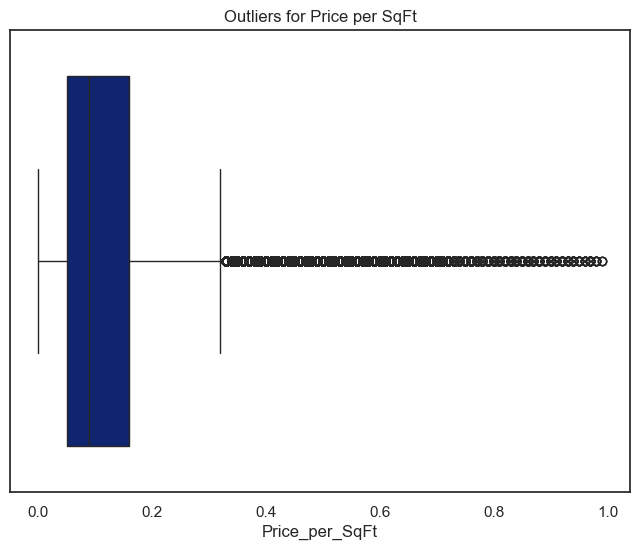

In [12]:
# Price per Sq. Ft outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["Price_per_SqFt"])
plt.title("Outliers for Price per SqFt")

## Location based Analysis

### Prepare location data

In [13]:
# Load location data
india_geo = gpd.read_file("../data/gadm41_IND_2.json")

In [14]:
# Check if names mismatch
set(df["State"].unique()) - set(india_geo["NAME_1"].unique())

{'Andhra Pradesh',
 'Delhi',
 'Madhya Pradesh',
 'Tamil Nadu',
 'Uttar Pradesh',
 'West Bengal'}

In [15]:
# Fix
df["State"] = df["State"].replace({
    "Andhra Pradesh" : "AndhraPradesh",
    "Delhi" : "NCTofDelhi",
    "Madhya Pradesh" : "MadhyaPradesh",
    "Tamil Nadu" : "TamilNadu",
    "Uttar Pradesh" : "UttarPradesh",
    "West Bengal" : "WestBengal"
})

### Average Price per Sq. Ft. by State

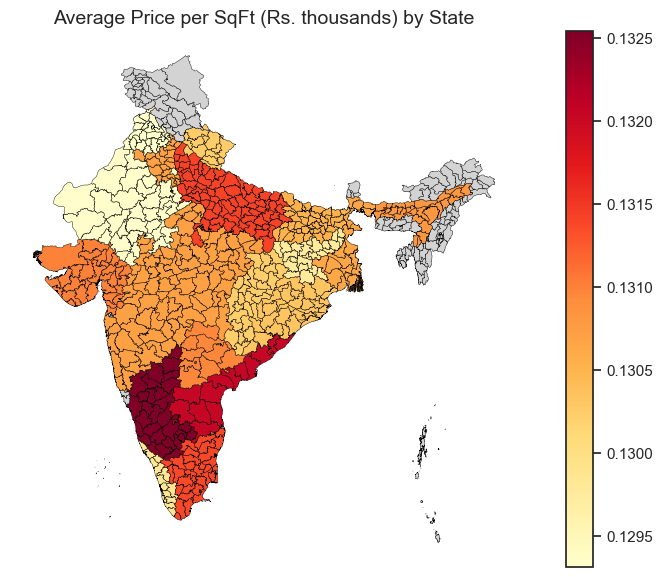

In [16]:
import json
# Compute state-level average price per sq ft
state_avg = df.groupby("State", as_index=False)["Price_per_SqFt"].mean()
state_avg.rename(columns={"Price_per_SqFt":"Avg_PPFS"}, inplace=True)
# Merge the averages into the GeoDataFrame
india_geo_merged = india_geo.merge(state_avg, left_on="NAME_1", right_on="State", how="left")
india_geo_merged[['NAME_1','NAME_2', 'Avg_PPFS']].head(10)

fig, ax = plt.subplots(figsize=(10, 6))

india_geo_merged.plot(
    column="Avg_PPFS",
    cmap="YlOrRd",
    linewidth=0.3,
    edgecolor="black",
    legend=True,
    ax=ax,
    missing_kwds={"color": "lightgrey", "label": "No data"}
)

ax.set_title("Average Price per SqFt (Rs. thousands) by State", fontsize=14)
ax.axis("off")

plt.tight_layout()
plt.show()


### Top Cities by Avg. Price

State
Karnataka        257.408465
TamilNadu        256.663684
UttarPradesh     256.249920
MadhyaPradesh    255.961459
Gujarat          255.790061
Name: Price_in_Lakhs, dtype: float64


Text(0.5, 1.0, 'Top 20 Cities by Average Price')

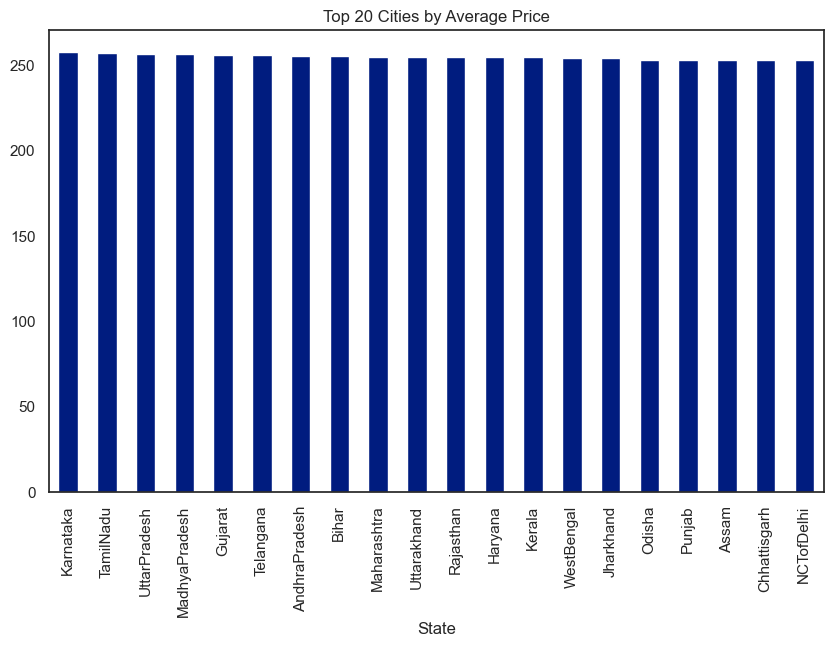

In [17]:
city_price = df.groupby("State")["Price_in_Lakhs"].mean().sort_values(ascending=False)
print(city_price.head())
plt.figure(figsize=(10,6))
city_price.head(25).plot(kind="bar")
plt.title("Top 20 Cities by Average Price")

## Correlation & Feature Interactions

### Correlation Heatmap

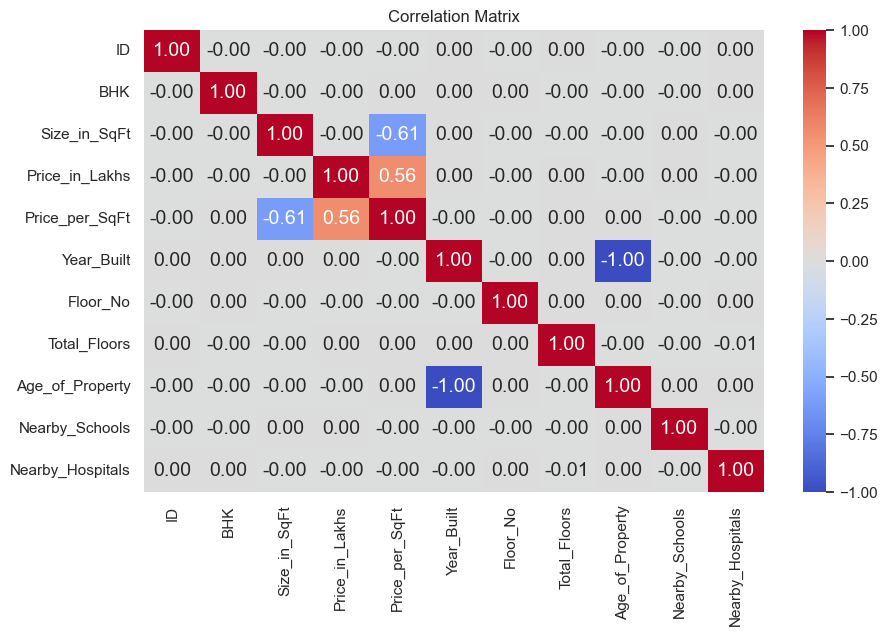

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Nearby Schools vs. Price per Sq. Ft.

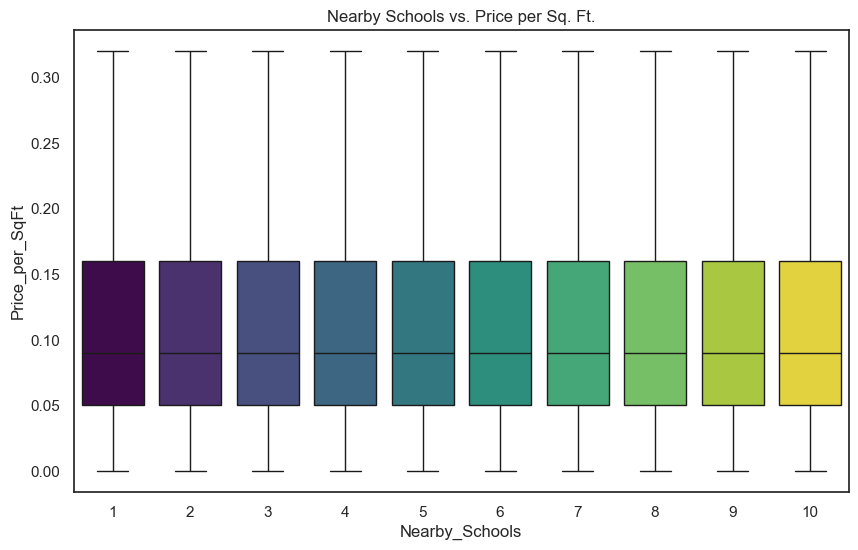

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df, 
    x="Nearby_Schools", 
    y="Price_per_SqFt",
    palette="viridis",
    hue="Nearby_Schools",
    legend=False,
    showfliers=False
)
plt.title("Nearby Schools vs. Price per Sq. Ft.")
plt.show()

### Nearby Hospitals vs. Price per Sq. Ft.

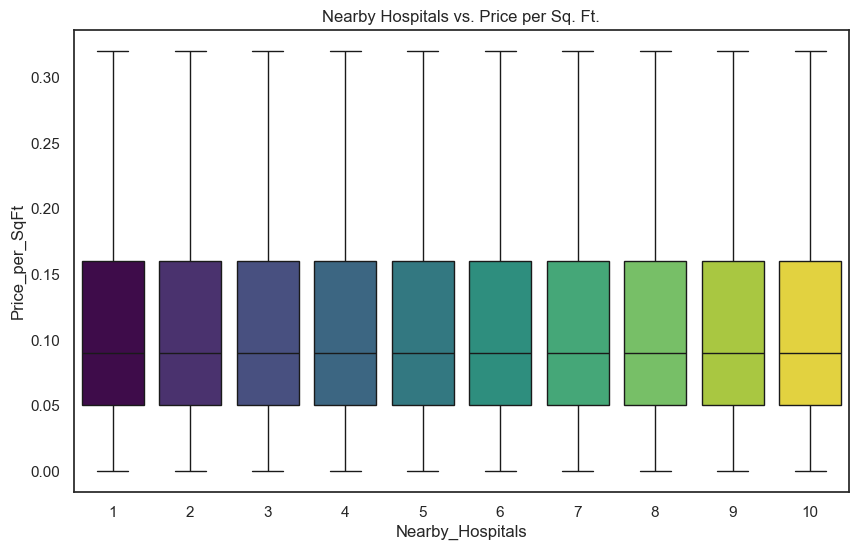

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df, 
    x="Nearby_Hospitals", 
    y="Price_per_SqFt", 
    palette="viridis",
    hue="Nearby_Hospitals",
    legend=False,
    showfliers=False
)
plt.title("Nearby Hospitals vs. Price per Sq. Ft.")
plt.show()

### Price by Furnished Status

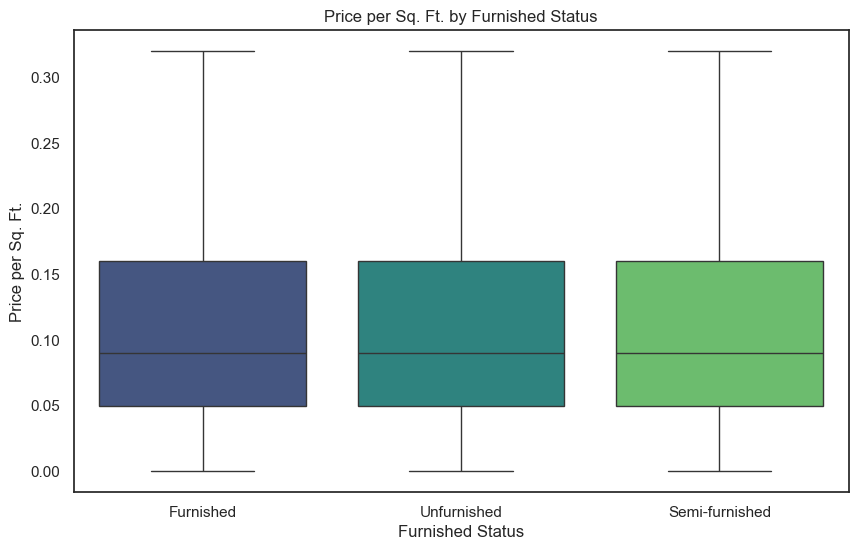

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df, 
    x="Furnished_Status", 
    y="Price_per_SqFt", 
    palette="viridis",
    hue="Furnished_Status",
    legend=False,
    showfliers=False
)
plt.title("Price per Sq. Ft. by Furnished Status")
plt.xlabel("Furnished Status")
plt.ylabel("Price per Sq. Ft.")
plt.show()

### Price per SqFt by Facing Direction

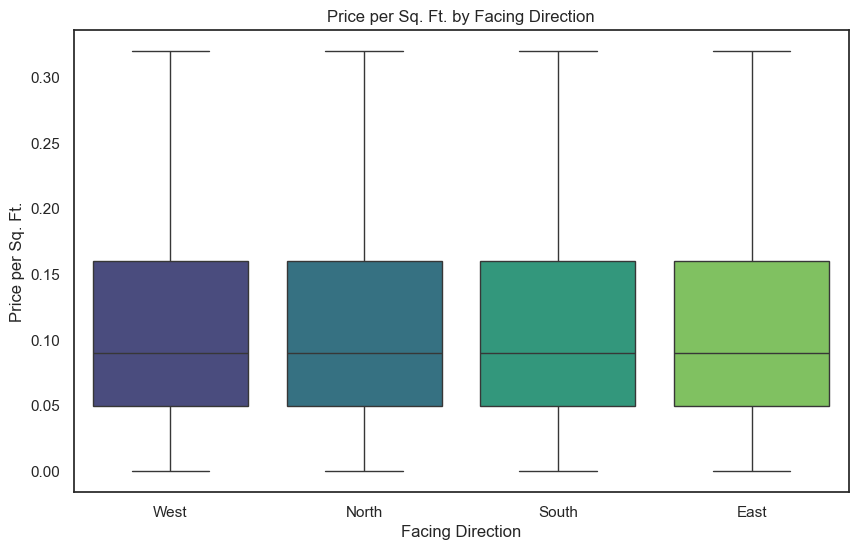

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df, 
    x="Facing", 
    y="Price_per_SqFt", 
    palette="viridis",
    hue="Facing",
    legend=False,
    showfliers=False
)
plt.title("Price per Sq. Ft. by Facing Direction")
plt.xlabel("Facing Direction")
plt.ylabel("Price per Sq. Ft.")
plt.show()

## Ownership, Availability, Amenities & Investment Analysis
### Owner type distribution

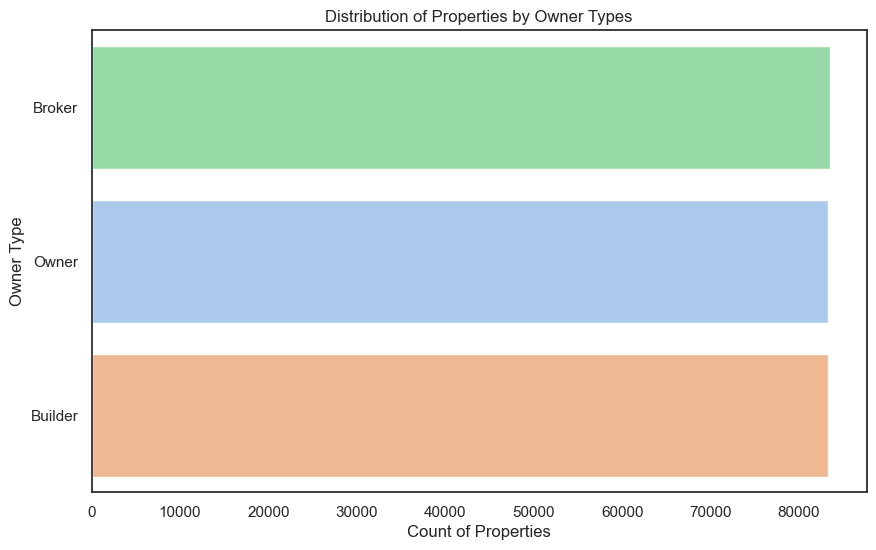

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(
    data=df, 
    y="Owner_Type",
    order=df['Owner_Type'].value_counts().index,
    palette="pastel",
    hue="Owner_Type",
    legend=False
)
plt.title("Distribution of Properties by Owner Types")
plt.xlabel("Count of Properties")
plt.ylabel("Owner Type")
plt.show()

### Impact of Parking Space on Price

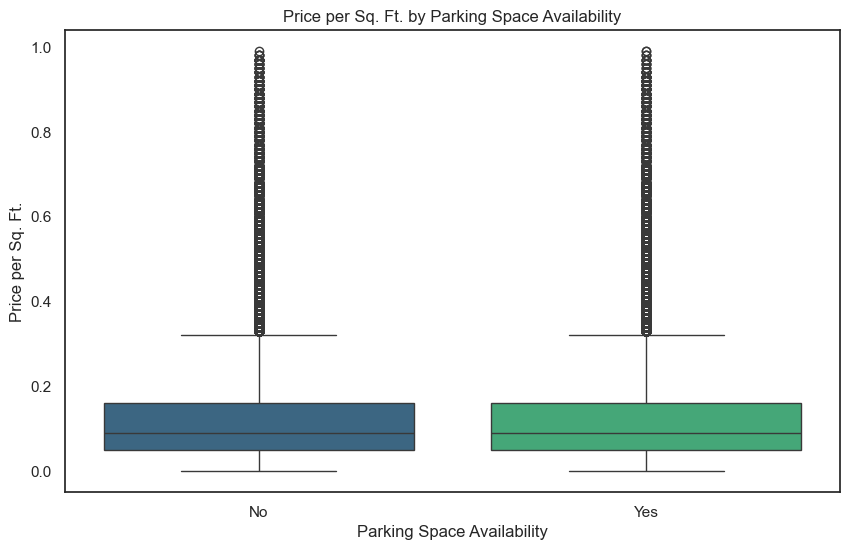

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df, 
    x="Parking_Space", 
    y="Price_per_SqFt",
    palette="viridis",
    hue="Parking_Space",
    legend=False,
)
plt.title("Price per Sq. Ft. by Parking Space Availability")
plt.xlabel("Parking Space Availability")
plt.ylabel("Price per Sq. Ft.")
plt.show()